In [1]:
import tensorflow as tf
# import tensorflow.keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, precision_score, recall_score,f1_score
import seaborn as sns
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

Using TensorFlow backend


In [2]:
# Dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(f'Number of images in X_train = {X_train.shape[0]}')
print(f'Number of images in X_test = {X_test.shape[0]}')
print(f'Shape of X_train = {X_train.shape}')
print(f'Shape of y_train = {y_train.shape}')
y_train = y_train.reshape(-1,)  # to flatten the array of classes of images
classes = ["airplane", "automobile", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck"]


def showImage(X, y, index):
    plt.figure(figsize=(3, 3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


def showImages(X, y, index1, index2):
    for i in range(index1, index2+1):
        plt.figure(figsize=(3, 3))
        plt.imshow(X[i])
        plt.xlabel(classes[y[i]])


# Data Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0


def y_pred_classes(y_pred):
    y_pred_classes_ = np.array([np.argmax(element) for element in y_pred])
    return y_pred_classes_


def plot_CM(y_pred_classes,i):
    cm = confusion_matrix(y_test,y_pred_classes)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix using CNN')
    plt.savefig(f"CM{i}.jpg")
    plt.show()
    

def plot_classification_report():
    print("Classification Report: \n", classification_report(y_test, y_pred_classes()))
def goodness(y_pred, y_true):
    print(f"Precision is {precision_score(y_true=y_true,y_pred=y_pred)}")


Number of images in X_train = 50000
Number of images in X_test = 10000
Shape of X_train = (50000, 32, 32, 3)
Shape of y_train = (50000, 1)


In [3]:
number_of_models=9

In [4]:
model_list=[]
for i in range(1,number_of_models+1):
    model_list.append(load_model(f"cnn{i}.keras"))

In [5]:
y_predictions=[]
for i in range(0,number_of_models):
    y_predictions.append(model_list[i].predict(X_test))

313/313 [==============================] - 23s 73ms/step


In [6]:
y_predictions_classes=y_predictions
for i in range(0,number_of_models):
    y_predictions_classes[i]=y_pred_classes(y_predictions[i])

In [7]:
y_predictions_classes

[array([3, 8, 8, ..., 5, 1, 7], dtype=int64),
 array([3, 1, 0, ..., 5, 1, 7], dtype=int64),
 array([3, 8, 8, ..., 5, 4, 7], dtype=int64),
 array([3, 8, 1, ..., 5, 4, 7], dtype=int64),
 array([3, 1, 1, ..., 5, 1, 7], dtype=int64),
 array([3, 8, 8, ..., 5, 2, 7], dtype=int64),
 array([3, 8, 8, ..., 5, 1, 7], dtype=int64),
 array([3, 1, 8, ..., 5, 1, 7], dtype=int64),
 array([3, 8, 8, ..., 5, 1, 7], dtype=int64)]

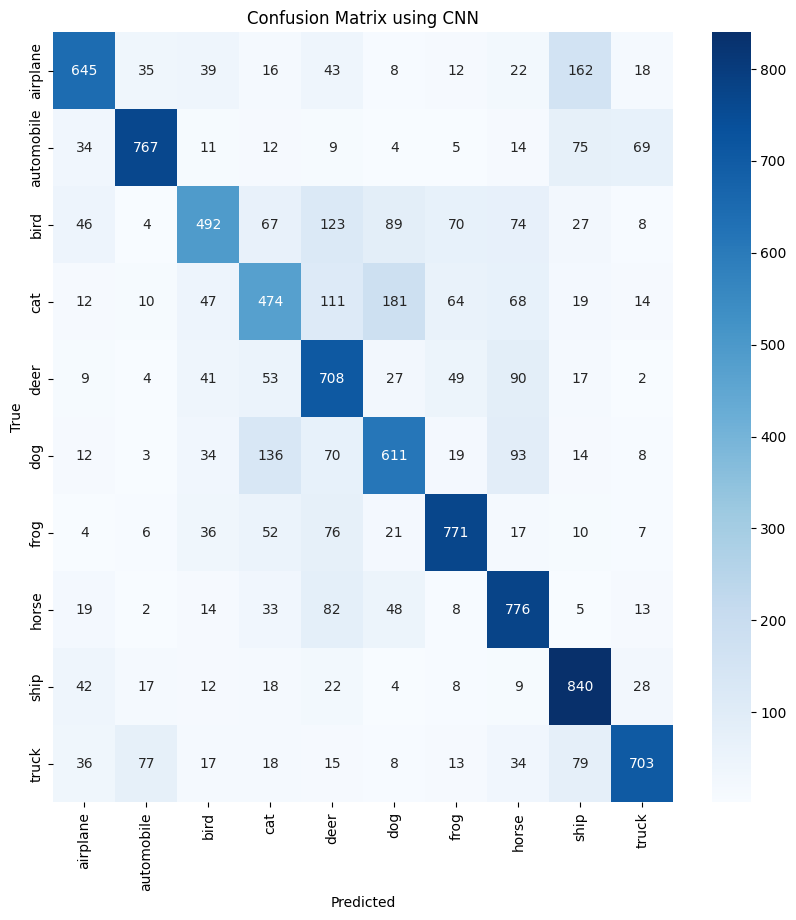

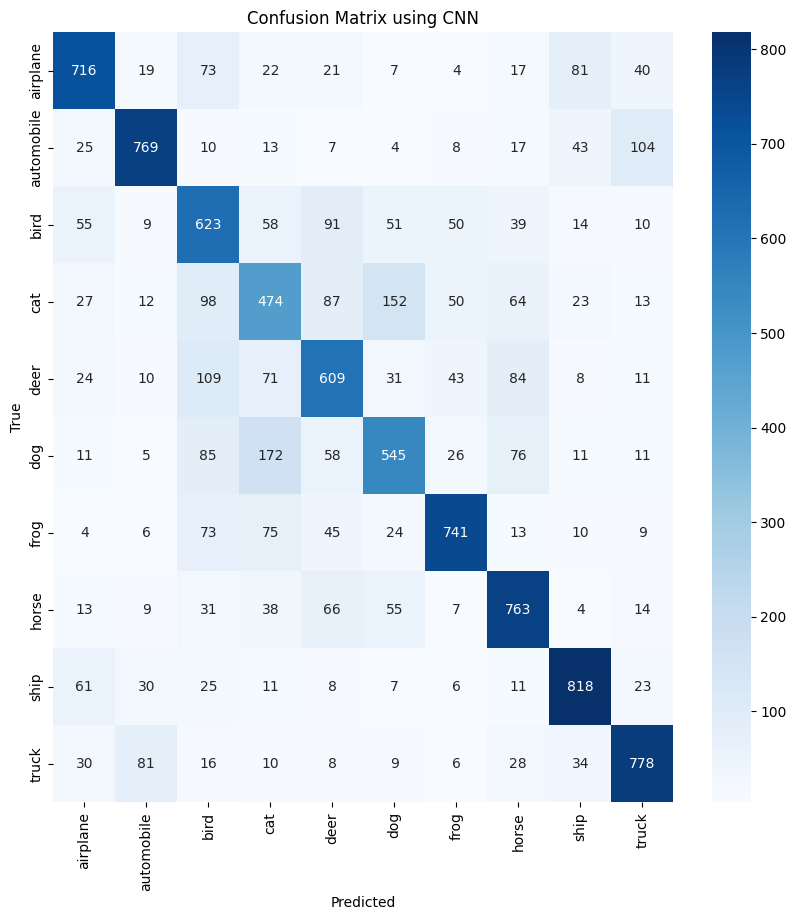

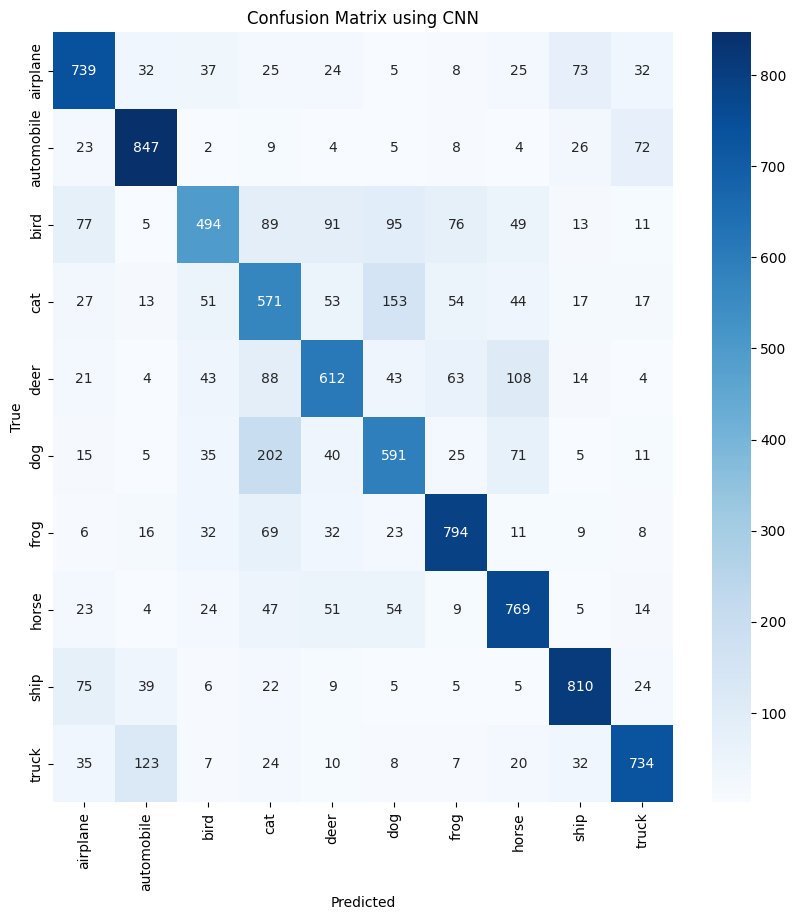

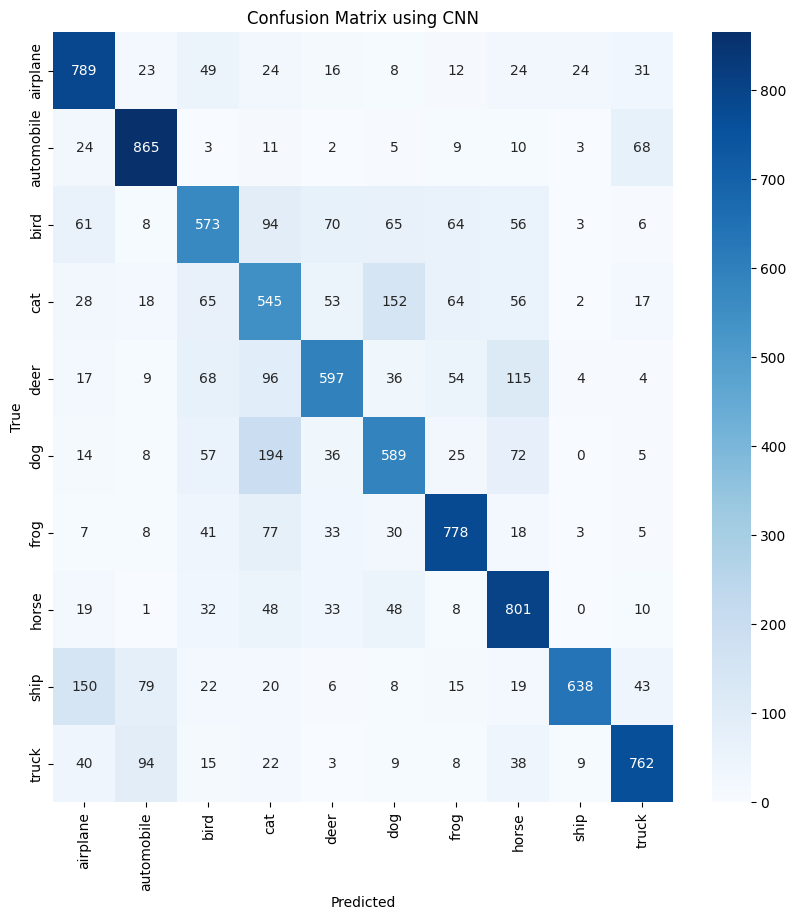

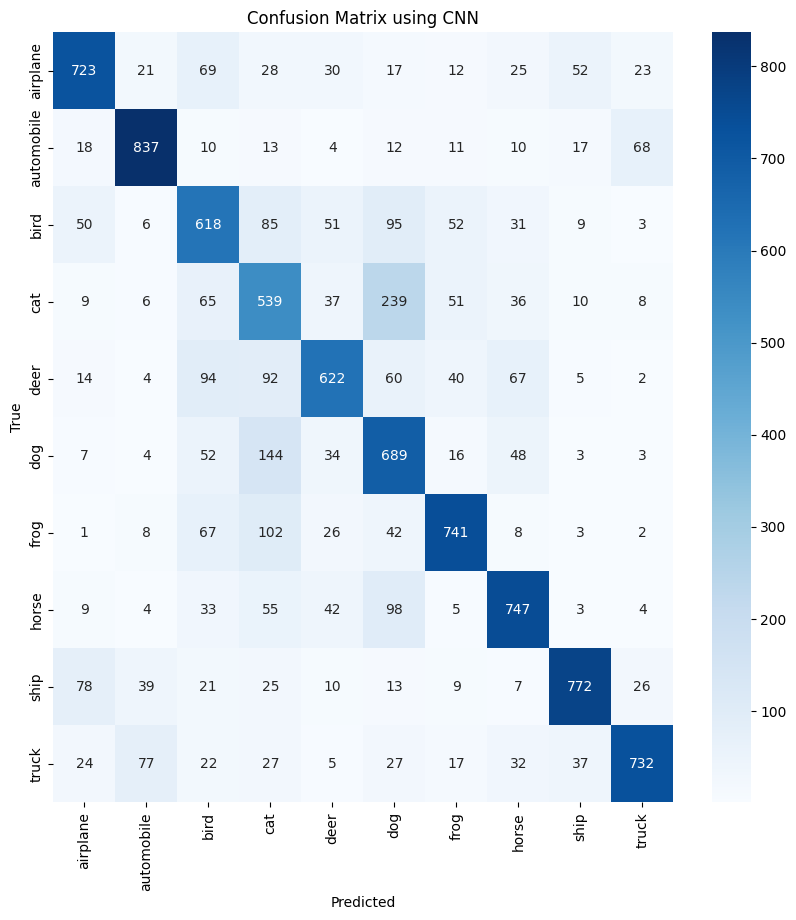

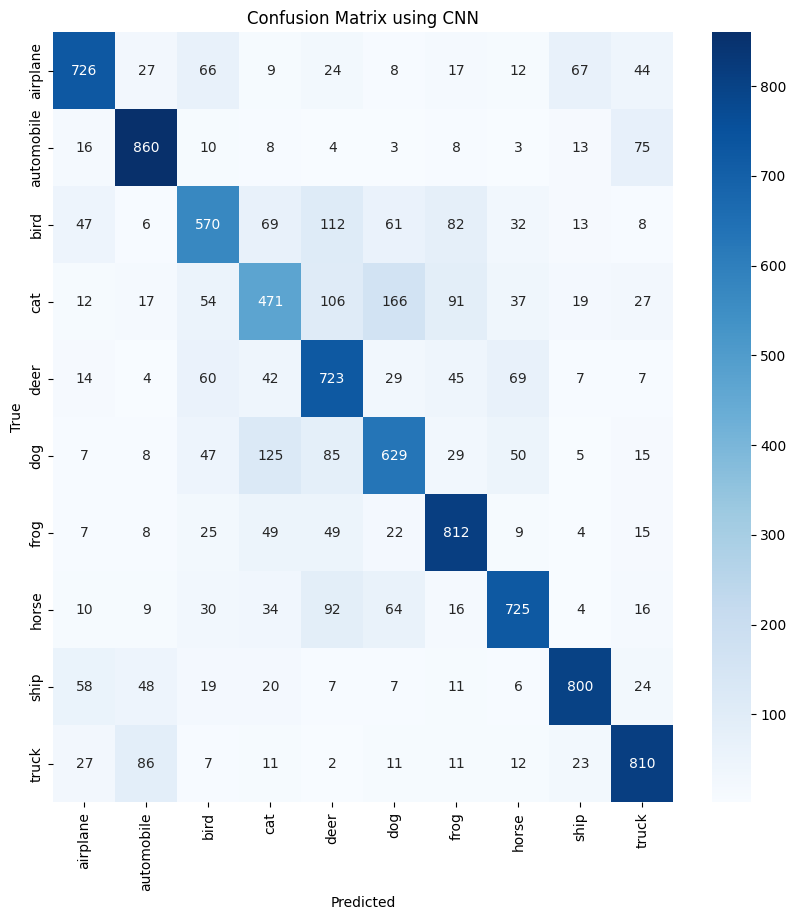

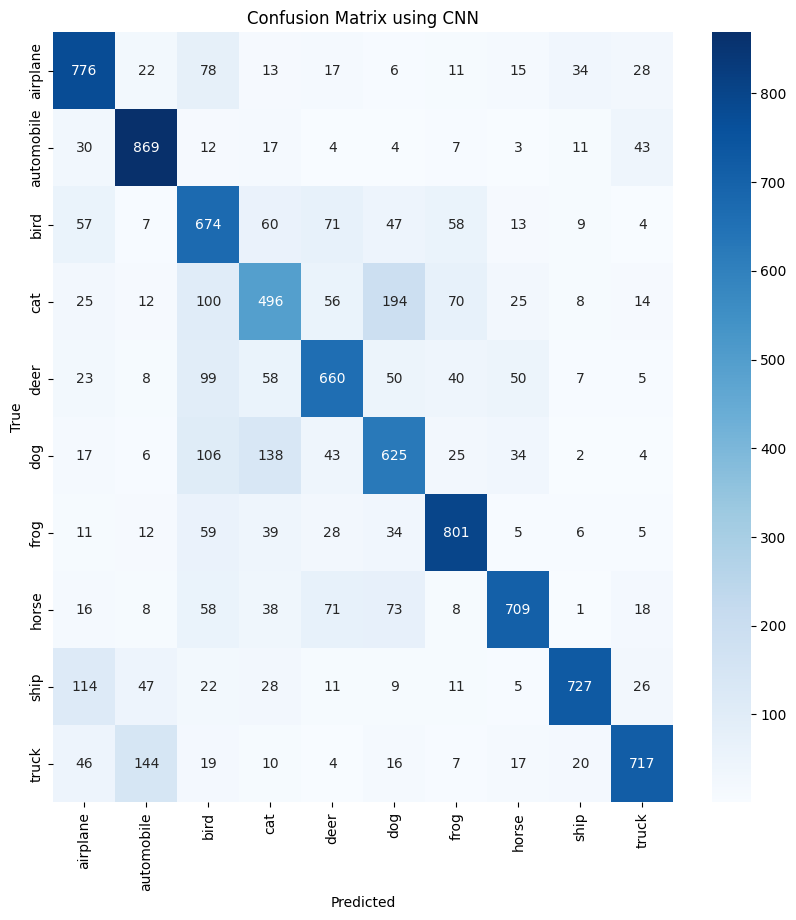

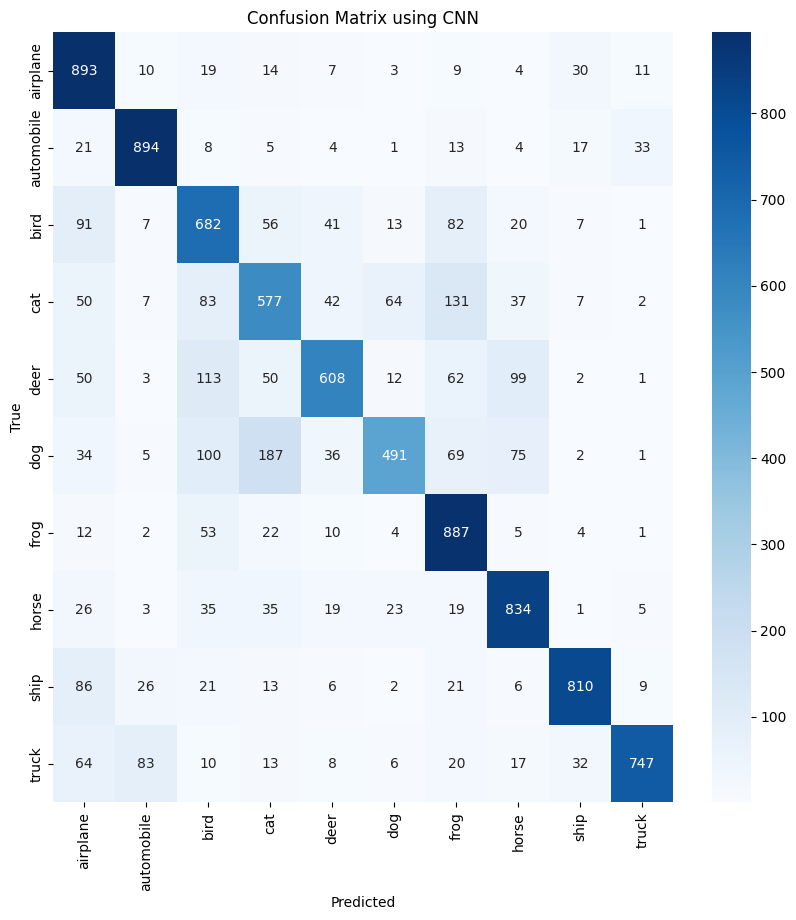

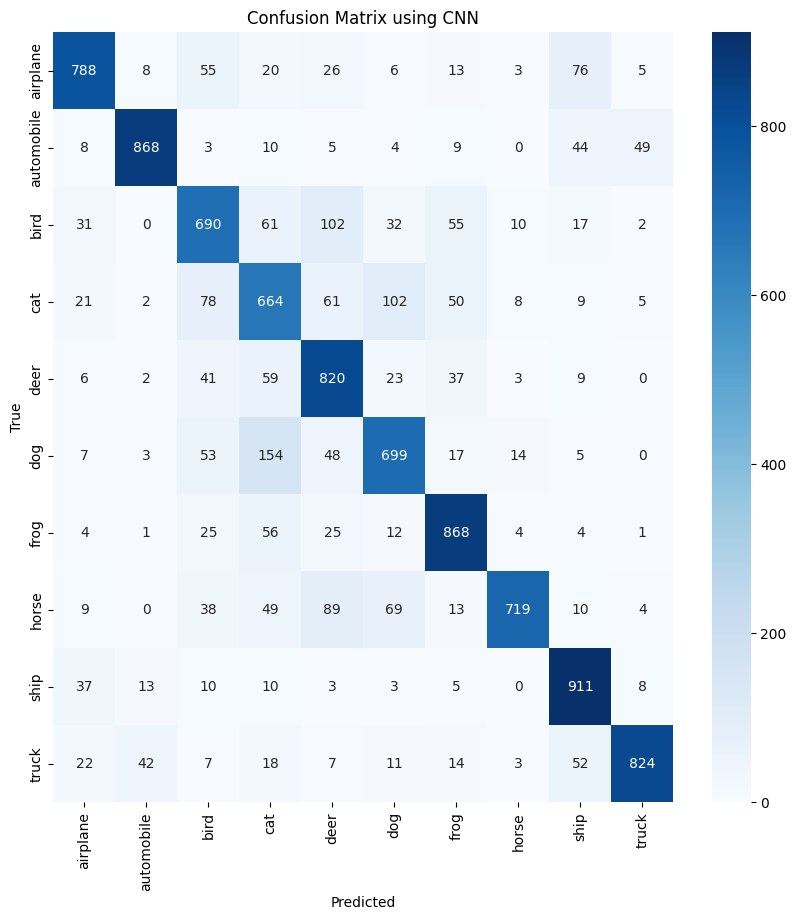

In [8]:
for i in range(number_of_models):
    plot_CM(y_predictions_classes[i],i+1)

In [9]:
Accuracy=[]
Precision_weighted=[]
Precision_macro=[]
Precision=[]
Recall_Score=[]
Recall_Score_macro=[]
Recall_Score_weighted=[]
F1_Score=[]
Classificaion_Reports= []

for i in range(number_of_models):
    Precision_macro.append(precision_score(y_test,y_predictions_classes[i],average='macro'))
    Precision_weighted.append(precision_score(y_test,y_predictions_classes[i],average='weighted'))
    Precision.append(precision_score(y_test,y_predictions_classes[i],average=None))
        
    Recall_Score_macro.append(recall_score(y_test,y_predictions_classes[i],average='macro'))
    Recall_Score_weighted.append(recall_score(y_test,y_predictions_classes[i],average='weighted'))
    Recall_Score.append(recall_score(y_test,y_predictions_classes[i],average=None))

    Accuracy.append(accuracy_score(y_test,y_predictions_classes[i]))
    Classificaion_Reports.append(classification_report(y_test,y_predictions_classes[i],target_names=classes))
    F1_Score.append(f1_score(y_test,y_predictions_classes[i],average='macro'))


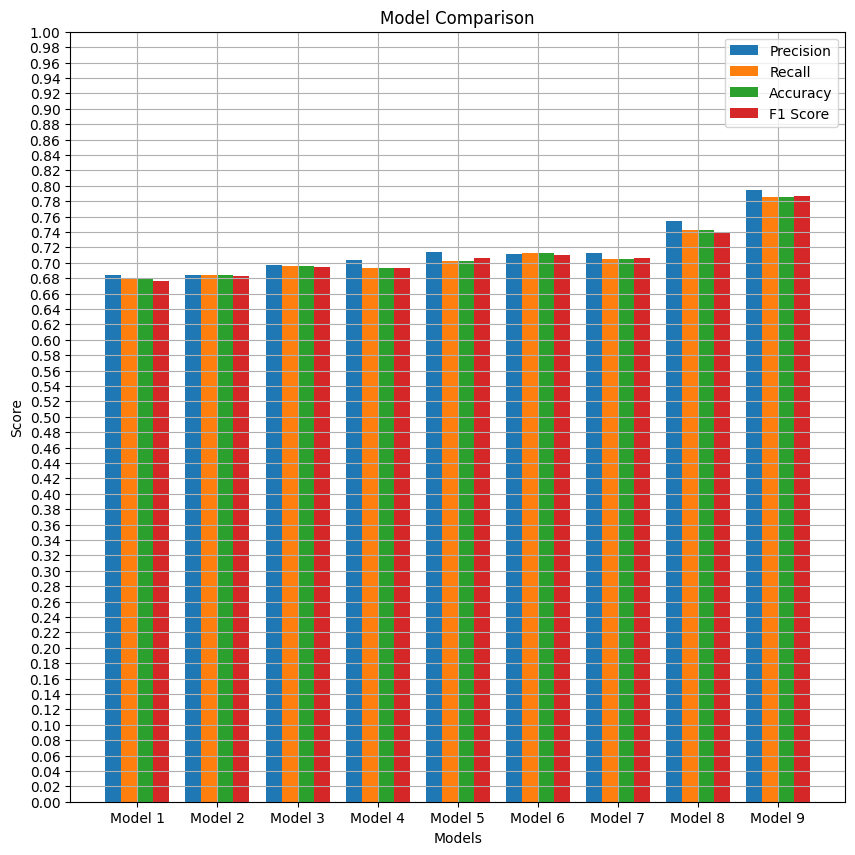

In [10]:
plt.figure(figsize=(10, 10))
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7','Model 8','Model 9']
model_numbers = np.arange(number_of_models)
wid=.2
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.ylim(0,1)



bar1=plt.bar(model_numbers,Precision_macro,width=wid,label='Precision')
bar2=plt.bar(model_numbers+wid,Recall_Score_macro,width=wid,label='Recall')
bar3=plt.bar(model_numbers+2*wid,Accuracy,width=wid,label='Accuracy')
bar4=plt.bar(model_numbers+3*wid,F1_Score,width=wid,label='F1')




plt.yticks(np.linspace(0,1,51))
plt.xticks(model_numbers+ 1.5*wid,model_names) 
plt.legend( (bar1, bar2, bar3,bar4), ('Precision', 'Recall', 'Accuracy','F1 Score') ) 
plt.grid(True)  
plt.savefig("comparison.jpg")
plt.show()
